In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

### Time Series Analysis and Forecasting For COVİD-19 Deaths in South Korea

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Time=pd.read_csv('/kaggle/input/coronavirusdataset/Time.csv').copy()
Time.head()

### Today, we will first model the deaths due to Covid-19 in South Korea as a time series and make predictions for the future. 

In [ ]:
Time.deceased.plot()

### Apparently deaths are increasing steadily. To understand which model will be better, we need to examine partial auto correlation and auto correlation graphs.

In [ ]:
olum=Time.deceased.copy()
olum.index=Time.date
olum=pd.DataFrame(olum)

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(olum)
plot_pacf(olum)

### When we examine first graphic, we will see partial autocorrelation graphic.  The first partial autocorrelation at lag zero is always 1.0. As seen in the preceding figure, the partial autocorrelation only at lag one is statistically significant while for rest the lags it is within the 95% confidence intervals. We can determine the parameters of AR series Hence, for data set the order of AR models is one.

### When we examine second graphic, we will see autocorrelation graphic.On the graph, there is a vertical line (a “spike”) corresponding to each lag. The height of each spike shows the value of the autocorrelation function for the lag.Each spike that rises above or falls below the dashed lines is considered to be statistically significant.This means the spike has a value that is significantly different from zero. If a spike is significantly different from zero, that is evidence of autocorrelation. A spike that’s close to zero is evidence against autocorrelation.We can determine the parameters of MA series. When we look at autocorrelation graphic, we will see that AR series, because our spikes decreasing steadily that's why there is a trend and our series not stationary. We know that contrary to the AR model, the finite MA model is always stationary. We can not say this MA series.


In [ ]:
#If we want to see for bigger lags autocorrelation graphic, we can use this function
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(olum)

### Modelling Time

### We have chosen type of series. Now we use various methods for the best model. Firstly we modeling with the main data set with AR after we will look aic value. Secondly, we will transform for data. We will be using box-cox transformation and after that again we will look aic value and compare with another model. 

In [ ]:
from statsmodels.tsa.ar_model import AR
model2=AR(olum).fit()#First model
model2.aic#Our aic value

In [ ]:
model2.params#Our params

In [ ]:
np.mean(model2.resid)

In [ ]:
model2.sigma2

### This model is AR(11). Means of our residuals equals zero and variance is constant. 

In [ ]:
sns.distplot(model2.resid)

In [ ]:
from scipy.stats import shapiro
shapiro(model2.resid)

### We will  Forecasting for ten days with  AR(11) model.We made our predictions using the mathematical formula to understand the logic of the AR series.

In [ ]:
forecast=Time.deceased.copy()
for i in range(1,10):
    forecast[i+70]=(model2.params[0]+forecast[len(forecast)-1]*model2.params[1]+forecast[len(forecast)-2]*model2.params[2]+forecast[len(forecast)-3]*model2.params[3]+forecast[len(forecast)-4]*model2.params[4]+forecast[len(forecast)-5]*model2.params[5]+
                    forecast[len(forecast)-6]*model2.params[6]+forecast[len(forecast)-7]*model2.params[7]+forecast[len(forecast)-8]*model2.params[8]+
                    forecast[len(forecast)-9]*model2.params[9]+forecast[len(forecast)-10]*model2.params[10]+forecast[len(forecast)-11]*model2.params[11])

In [ ]:
forecast.tail(10)

### Another Model is a boxcox transformation


In [ ]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
donusum5=olum.copy()
donusum5=donusum5+1
donusum5,fitted_lambda2= boxcox(donusum5.iloc[:,0],lmbda=None)
inv_boxcox(donusum5,fitted_lambda2)

### I have collected with 1 due to in the data set we have zero values. The new dataset is donusum 5. After modeling tries we will again convert donusum 5 to the original form thanks to inv_boxcox. Fitted Lambda 2 is our parameter of boxcox transformation

In [ ]:
model_10=AR(donusum5).fit()
model_10.aic

### The new model has better aic value. 
The lower the aic value, the better our model. We will use this model for forecasting.

In [ ]:
model_10.params#Changed the coefficient of parameters

In [ ]:
model_10.pvalues#When we look p values, our parameters are looking statistical significant

### MODELLING



In [ ]:
forecast4=donusum5.copy()
forecast4=np.array(forecast4)
for i in range(1,40):
    
    forecast4=np.append(forecast4,(model_10.params[0]+forecast4[len(forecast4)-1]*model_10.params[1]+forecast4[len(forecast4)-2]*model_10.params[2]+
                     forecast4[len(forecast4)-3]*model_10.params[3]+forecast4[len(forecast4)-4]*model_10.params[4]+forecast4[len(forecast4)-5]*model_10.params[5]+
                    forecast4[len(forecast4)-6]*model_10.params[6]+forecast4[len(forecast4)-7]*model_10.params[7]+forecast4[len(forecast4)-8]*model_10.params[8]+
                    forecast4[len(forecast4)-9]*model_10.params[9]+forecast4[len(forecast4)-10]*model_10.params[10]+forecast4[len(forecast4)-11]*model_10.params[11]))

In [ ]:
sonuc=pd.DataFrame(inv_boxcox(forecast4,fitted_lambda2))#We converted boxcox data to original data
sonuc.tail(40)

### This time we did forecasting for 40 days and we will compare real deaths.

In [ ]:
pd.DataFrame(inv_boxcox(forecast4,fitted_lambda2)).plot()

### When we examine the graphic above, we see that the number of deaths that have been increasing for North Korea has started to decrease after a while. According to our estimates, the decline starts from the 80th observation. In other words, a drop in death rates is expected, such as 18 of April. I hope everything happens sooner than we expected and death rates will decrease.

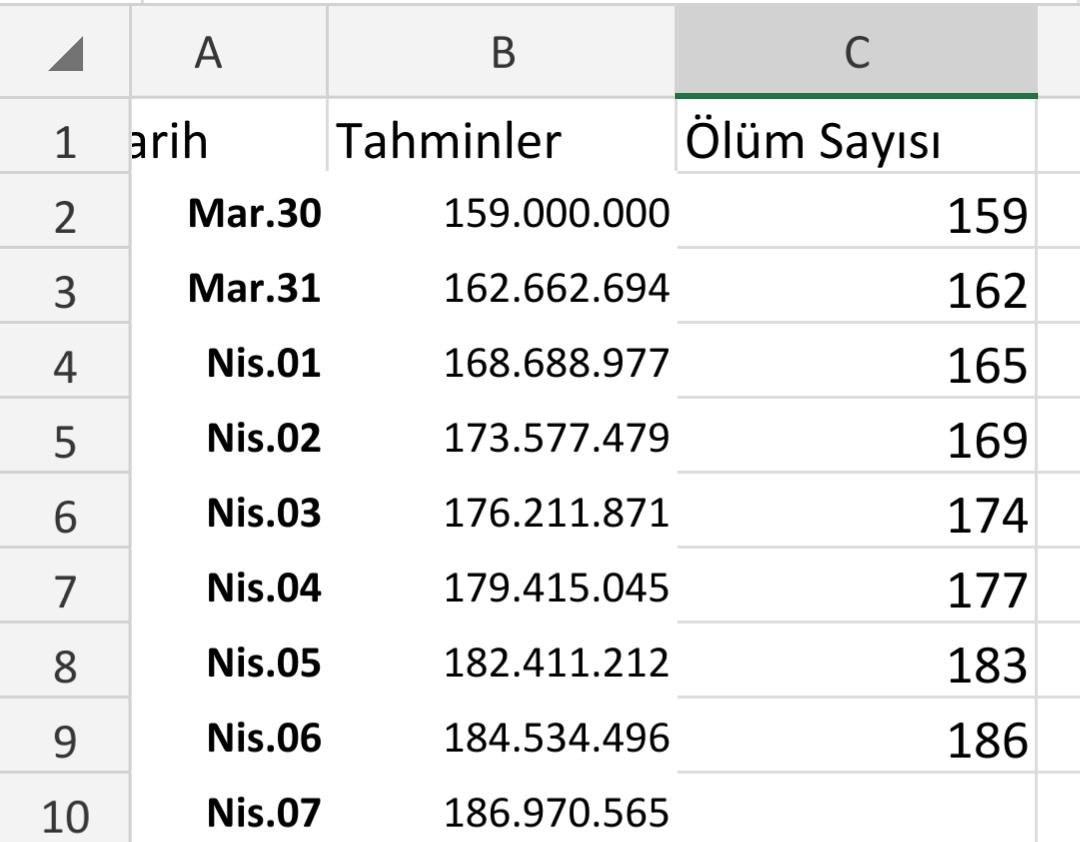

### In the data set in the picture, the first column 2 is our estimation values, and column 3 is the actual number of measurements. When we look at the difference between the estimation values ​​and our real values, it is noticeable that our estimates are very close to the real values, in other words, there is a difference between 5 and 10 per thousand. I think this difference is very good :) if there aren't errors, it would be mathematic :) 